In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()


Saving appliances.csv to appliances.csv


In [ ]:
file_path = 'appliances.csv'
df = pd.read_csv(file_path)

df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.interpolate import UnivariateSpline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.svm import SVR

X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Normalizing features using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Results dictionary to store performance metrics for each model
results = {
    'Regression Tree': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Ridge Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Lasso Regression': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Principal Component Regression (PCR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Regression Splines': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []},
    'Support Vector Regression (SVR)': {'MSE': [], 'RMSE': [], 'RSE': [], 'RSS': [], 'R^2': []}
}

num_features = X.shape[1]

# Running the models multiple times to compute average metrics
for _ in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=None)

    # Defining models
    models = {
        'Regression Tree': DecisionTreeRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Principal Component Regression (PCR)': make_pipeline(PCA(n_components=num_features), LinearRegression()),
        'Regression Splines': make_pipeline(PolynomialFeatures(degree=3), LinearRegression()),
        'Support Vector Regression (SVR)': SVR()
    }

    # Fitting models and computing metrics
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        rss = np.sum((y_test - y_pred) ** 2)
        rse = np.sqrt(rss / (len(y_test) - X_test.shape[1] - 1))
        r2 = r2_score(y_test, y_pred)

        results[model_name]['MSE'].append(mse)
        results[model_name]['RMSE'].append(rmse)
        results[model_name]['RSE'].append(rse)
        results[model_name]['RSS'].append(rss)
        results[model_name]['R^2'].append(r2)

# Calculating average results
average_results = {model: {metric: np.mean(scores) for metric, scores in metrics.items()} for model, metrics in results.items()}

# Converting results to a DataFrame for better visualization
results_df = pd.DataFrame(average_results).T
results_df

,MSE,RMSE,RSE,RSS,R^2
Regression Tree,9687.600912,98.390747,98.624217,5.736028e+07,0.080801
Ridge Regression,8868.002560,94.143602,94.366994,5.250744e+07,0.159930
Lasso Regression,9032.368634,95.013322,95.238778,5.348065e+07,0.144324
Principal Component Regression (PCR),8868.128433,94.144275,94.367669,5.250819e+07,0.159918
Regression Splines,7555.853398,86.900138,87.106342,4.473821e+07,0.283582
Support Vector Regression (SVR),10411.259794,102.008316,102.250370,6.164507e+07,0.013701


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Running GridSearchCV for Ridge Regression...
Ridge Regression - Best Parameters: {'ridge__alpha': 1}
Ridge Regression - Metrics: {'MSE': 8579.728463736881, 'RMSE': 92.6268236729344, 'RSE': 92.84661644491035, 'RSS': 50800572.23378608, 'R²': 0.16722862010561013}



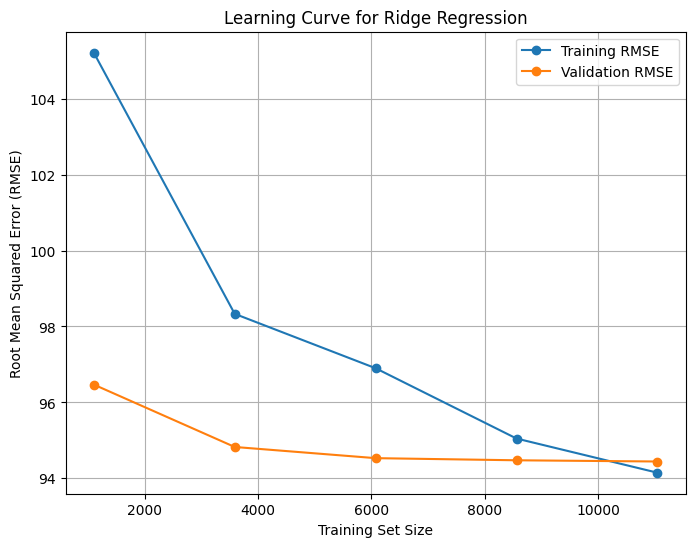

Running GridSearchCV for Lasso Regression...
Lasso Regression - Best Parameters: {'lasso__alpha': 0.01}
Lasso Regression - Metrics: {'MSE': 8579.348322406753, 'RMSE': 92.6247716456389, 'RSE': 92.84455954839069, 'RSS': 50798321.41697039, 'R²': 0.16726551763930053}



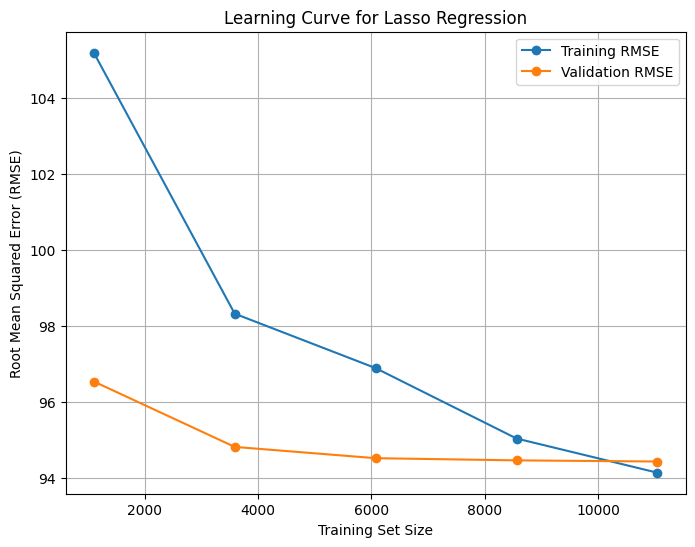

Running GridSearchCV for Principal Component Regression (PCR)...
Principal Component Regression (PCR) - Best Parameters: {'pca__n_components': 27}
Principal Component Regression (PCR) - Metrics: {'MSE': 8579.65548392858, 'RMSE': 92.62642972677172, 'RSE': 92.84622156395885, 'RSS': 50800140.12034112, 'R²': 0.16723570372089247}



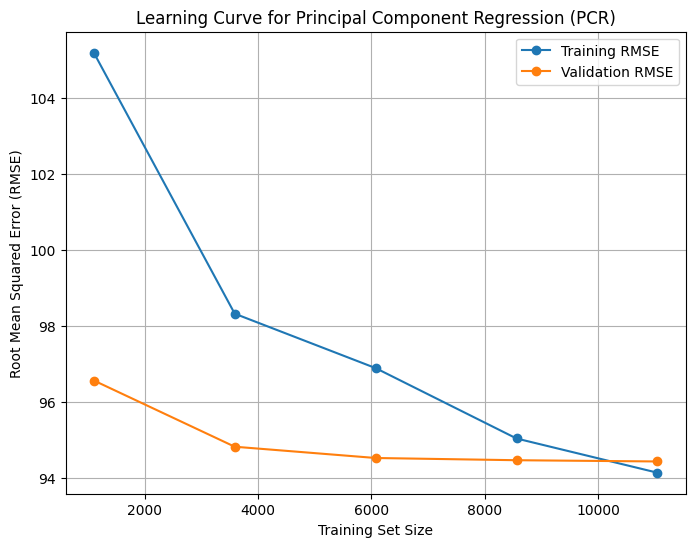

Running GridSearchCV for Regression Splines...
Regression Splines - Best Parameters: {'polynomialfeatures__degree': 2}
Regression Splines - Metrics: {'MSE': 7477.4720317863985, 'RMSE': 86.47237727613599, 'RSE': 86.67756625646831, 'RSS': 44274111.900207266, 'R²': 0.2742165759264251}



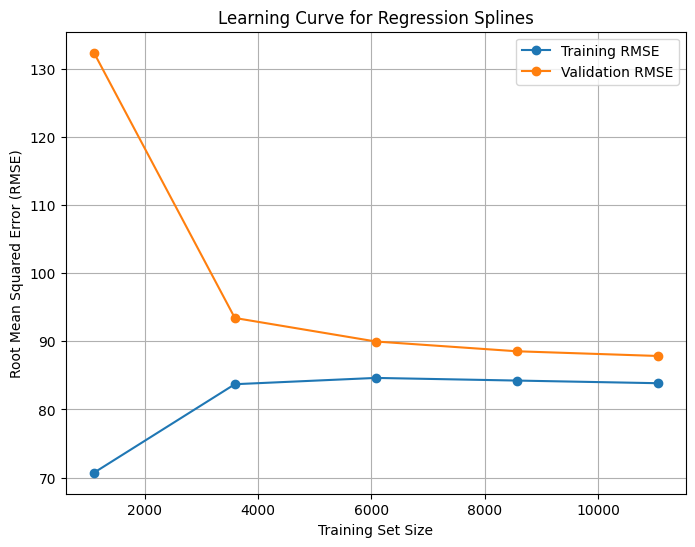

Running GridSearchCV for Regression Tree...
Regression Tree - Best Parameters: {'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 10, 'decisiontreeregressor__min_samples_split': 10}
Regression Tree - Metrics: {'MSE': 9017.986560244068, 'RMSE': 94.96307998503454, 'RSE': 95.1884164238504, 'RSS': 53395498.42320512, 'R²': 0.12469011771351735}



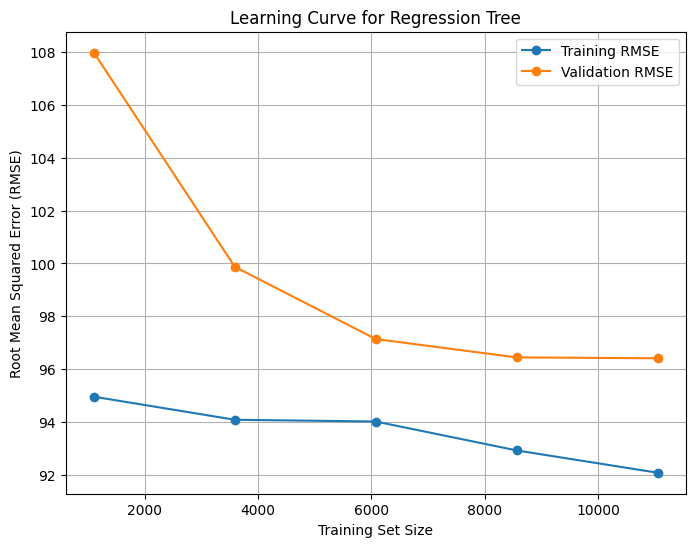

Running GridSearchCV for Support Vector Regression (SVR)...
Support Vector Regression (SVR) - Best Parameters: {'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
Support Vector Regression (SVR) - Metrics: {'MSE': 9924.722028625107, 'RMSE': 99.62289911774856, 'RSE': 99.85929277005263, 'RSS': 58764279.13148926, 'R²': 0.036679949280519986}



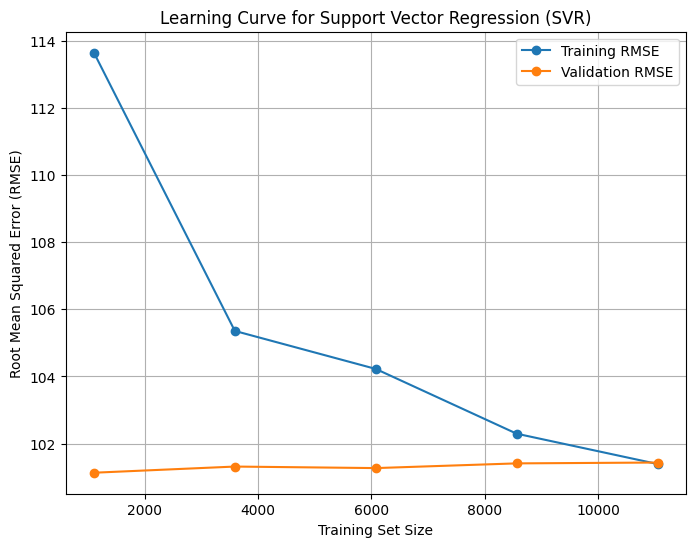


Model Performance Metrics:
                                              MSE       RMSE        RSE  \
Ridge Regression                      8579.728464  92.626824  92.846616   
Lasso Regression                      8579.348322  92.624772  92.844560   
Principal Component Regression (PCR)  8579.655484  92.626430  92.846222   
Regression Splines                    7477.472032  86.472377  86.677566   
Regression Tree                       9017.986560  94.963080  95.188416   
Support Vector Regression (SVR)       9924.722029  99.622899  99.859293   

                                               RSS        R²  
Ridge Regression                      5.080057e+07  0.167229  
Lasso Regression                      5.079832e+07  0.167266  
Principal Component Regression (PCR)  5.080014e+07  0.167236  
Regression Splines                    4.427411e+07  0.274217  
Regression Tree                       5.339550e+07  0.124690  
Support Vector Regression (SVR)       5.876428e+07  0.036680  

Best

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Ridge Regression': {'ridge__alpha': [0.01, 0.1, 1, 10, 100]},
    'Lasso Regression': {'lasso__alpha': [0.01, 0.1, 1, 10, 100]},
    'Principal Component Regression (PCR)': {'pca__n_components': [1, 2, 3, 4, X.shape[1]]},
    'Regression Splines': {'polynomialfeatures__degree': [2, 3]},
    'Regression Tree': {
      'decisiontreeregressor__max_depth': [3, 4, 5],
      'decisiontreeregressor__min_samples_split': [10, 15, 20],
      'decisiontreeregressor__min_samples_leaf': [4, 8, 10]
},
    'Support Vector Regression (SVR)': {'svr__C': [0.1, 1, 10], 'svr__epsilon': [0.1, 0.5, 1], 'svr__kernel': ['linear']}

}



# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# Function to calculate metrics
def calculate_metrics(y_true, y_pred, n_features):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    rss = np.sum((y_true - y_pred) ** 2)
    rse = np.sqrt(rss / (len(y_true) - n_features - 1))
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'RSE': rse, 'RSS': rss, 'R²': r2}

# Function to plot learning curves

def plot_learning_curve(model, X, y, model_name, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1
    )
    train_rmse = np.sqrt(-train_scores.mean(axis=1))
    test_rmse = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_rmse, label="Training RMSE", marker='o')
    plt.plot(train_sizes, test_rmse, label="Validation RMSE", marker='o')
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Root Mean Squared Error (RMSE)")
    plt.legend()
    plt.grid()
    plt.show()

# Dictionary to store results
results = {}
best_parameters = {}

# Iterate over each model and perform GridSearchCV
for model_name, grid_params in param_grids.items():
    print(f"Running GridSearchCV for {model_name}...")

    # Define the model pipeline
    if model_name == 'Principal Component Regression (PCR)':
        model = make_pipeline(StandardScaler(), PCA(), LinearRegression())
    elif model_name == 'Regression Splines':
        model = make_pipeline(PolynomialFeatures(), LinearRegression())
    elif model_name == 'Ridge Regression':
        model = make_pipeline(StandardScaler(), Ridge(max_iter=5000))
    elif model_name == 'Lasso Regression':
        model = make_pipeline(StandardScaler(), Lasso(max_iter=5000))
    elif model_name == 'Regression Tree':
        model = make_pipeline(StandardScaler(), DecisionTreeRegressor())
    elif model_name == 'Support Vector Regression (SVR)':
        model = make_pipeline(StandardScaler(), SVR())

    # Perform GridSearchCV
    grid_search = GridSearchCV(model, grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store the best parameters
    best_parameters[model_name] = grid_search.best_params_

    # Predict on the test set using the best estimator
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Calculate performance metrics
    metrics = calculate_metrics(y_test, y_pred, X_test_scaled.shape[1])
    results[model_name] = metrics

    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Metrics: {metrics}\n")

    # Plot learning curve for the best model
    plot_learning_curve(best_model, X_train_scaled, y_train, model_name)

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("\nModel Performance Metrics:")
print(results_df)

# Display best parameters for each model
print("\nBest Parameters for Each Model:")
for model_name, params in best_parameters.items():
    print(f"{model_name}: {params}")

In [ ]:
results_df

,MSE,RMSE,RSE,RSS,R²
Ridge Regression,8579.728464,92.626824,92.846616,5.080057e+07,0.167229
Lasso Regression,8579.348322,92.624772,92.844560,5.079832e+07,0.167266
Principal Component Regression (PCR),8579.655484,92.626430,92.846222,5.080014e+07,0.167236
Regression Splines,7477.472032,86.472377,86.677566,4.427411e+07,0.274217
Regression Tree,9017.986560,94.963080,95.188416,5.339550e+07,0.124690
Support Vector Regression (SVR),9924.722029,99.622899,99.859293,5.876428e+07,0.036680
